In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation


In [114]:
global theta, alpha, data, j_y
j_y = []
theta = np.zeros((2, 1))
alpha = 0.01
interrations = 1500
path = "D:\BaiduNetdiskDownload\AI学习资料\machine-learning-2014\机器学习课程2014源代码\python代码\ex1-linear regression\ex1data1.txt"
data = pd.read_csv(path, sep=",", names=["population", "profit"])
data["ones"] = 1

In [118]:
# Define the gradient descent function
def gra_dent():
    # Initialize temporary variables for theta0 and theta1
    tem_theta0, tem_theta1 = theta[0][0], theta[1][0]
    
    # Create a new data array with ones and population data
    new_data = np.array([data["ones"], data["population"]])
    
    # Get the number of training examples
    m = new_data.shape[1]
    
    # Create a new array with population data
    x_theta = np.array([data["population"]]).T
    
    # Calculate the difference between the hypothesis and the actual profit
    sub = theta.T.dot(new_data) - np.array([data["profit"]])
    
    # Update temporary theta0 and theta1 using the gradient descent formula
    tem_theta0 -= alpha*((1/m)*sub.sum())
    tem_theta1 -= alpha*((1/m)*(sub.dot(x_theta)).sum())
    
    # Update theta0 and theta1 with the new values
    theta[0][0]=tem_theta0
    theta[1][0]=tem_theta1
    
    # Calculate the cost function and append it to j_y
    m_sums = (1/m)*(sub.sum())**2
    j_y.append(m_sums)
    
    # Return the updated theta values
    return theta

# Get the number of training examples
m = data.shape[0]

# Run the gradient descent function for a specified number of iterations
for i in range(interrations):
    gra_dent()

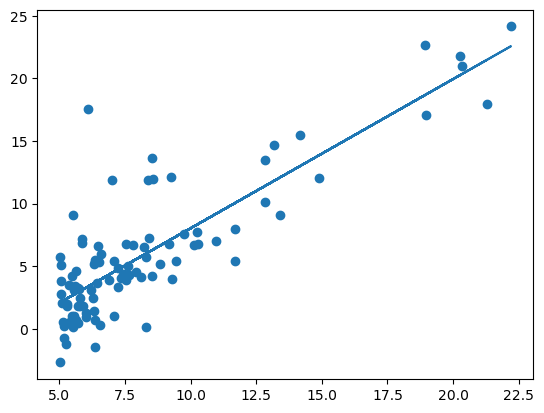

(97,)

In [133]:
# Create a new array with ones and population data
new_data = np.array([data["ones"], data["population"]])

# Create an array with population data
x = np.array(data["population"])

# Create an array with profit data
y = np.array(data["profit"])

# Calculate the predicted profit using the theta values and the new_data array
y_after = np.array(theta.T.dot(new_data))[0]

# Create a new figure and a set of subplots
fig,axes = plt.subplots()

# Plot the population data (x) against the profit data (y) as scatter plot
axes.scatter(x,y)

# Plot the population data (x) against the predicted profit data (y_after) as a line plot
axes.plot(x,y_after)

# Display the figure
plt.show()

# Print the shape of the predicted profit data array
y_after.shape